In [1]:
import os
import pandas as pd
import numpy as np
from datetime import timedelta

In [2]:


pd.set_option('display.max_colwidth', -1)
news_data =pd.read_csv("News_Data_Updated.csv")

In [3]:
news_data.shape

(30701, 11)

In [6]:
news_data.head(10)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,27790.0,Intellitec Solutions to Host 13th Annual Spring Microsoft Dynamics User Group,"Over 100 attendees expected to see latest version of Microsoft Dynamics SL and Dynamics GP (PRWeb February 29, 2016) Read the full story at http://www.prweb.com/releases/2016/03/prweb13238571.htm",PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
1,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine Liberation Organization’s Sectretary-General Saeb Erekat Thursday expressed his concerns over Kenyan President Uhuru Kenyatta’s visit to Jerusalem and the Jordan Valley.",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
2,80771.0,Fire claims more than 100-year-old barn in Hancock County,A Hancock County man lost a barn early Monday morning that had been in his family more than 100 years.,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
3,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft has targeted its rival Apple in its new series of ads focusing on Windows 10, gross bugs, and the Windows machines.",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
4,27813.0,Microsoft Project Centennial seen with “universal” desktop Office,"Microsoft may have burned off one bridge, but it is still building a different, and perhaps more critical build. Redmond has officially declared Project Astoria, the bridge that would let Android developers easily port their apps to Windows 10, dead but Project Centennial seems to be very much alive and kicking. In fact, it might have an rather ambitious demo … Continue reading",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1
5,27812.0,Microsoft sneaks onto Android while Android sneaks onto Windows,"The platform battles are back MWC16 +Analysis Two parallel trends bubbled away at MWC this year – but without getting much attention. When Android and Microsoft converge, it’s going to be the next big platform battle, and one Microsoft can’t afford to lose.…",The Register,microsoft,2015-03-01 02:15:00,0.000000,0.052670,-1,-1,-1
6,27814.0,"HoloLens dev edition costs £2,000 with new Conker game","Microsoft’s AR headset is being made available to developers, along with three new games – including one based on Conker’s Bad Fur Day.",Metro,microsoft,2015-03-01 02:18:00,0.000000,0.079434,-1,-1,-1
7,27823.0,Microsoft Word for Mac 2016 review: A subtle yet massive leap forward in usability and features,"What is A + B? Welcome to our review of Word for Mac 2016, updated on 29 Feb 2016.",Macworld UK,microsoft,2015-03-01 02:54:00,-0.023883,-0.032275,-1,-1,-1
8,27827.0,Microsoft Band 2 gains appeal with lower price,"The Microsoft Band 2 hit the market in late 2015 and looked much better to the eye than the original wearable from Microsoft. The biggest downside to that wearable was the price tag for many people, when it originally debuted the Band 2 sold for $249.99. Microsoft is aiming to make its device more appealing to buyers not by adding … Continue reading",SlashGear,microsoft,2015-03-01 03:10:00,-0.070868,0.000000,-1,-1,-1
9,27828.0,Microsoft prepares to unleash Office 2016 full desktop apps on Windows Store?,"It seems that Microsoft is getting ready to push out a Project Centennial version of the Office 2016 suite on the Windows Store – or at least, a test version is now available, which certainly points to the possibility of this happening before long. Project Centennial focuses on allowing developers to convert their Win32 desktop apps to ones which are compatible with the Windows Store and",TechRadar,microsoft,2015-03-01 03:10:00,0.000000,0.001367,-1,-1,-1


In [4]:
news_data.loc[news_data['Facebook'] == 0, 'Topic'].value_counts(normalize = True)

microsoft    0.620814
palestine    0.379186
Name: Topic, dtype: float64

In [43]:
#news_data['Topic']

In [5]:
microsoft = news_data[news_data['Topic'] == "microsoft"]
#palestine = news_data[news_data['Topic'] == "palestine"]

Facebook_Microsoft = pd.read_csv("Facebook_Microsoft.csv")
GooglePlus_Microsoft = pd.read_csv("GooglePlus_Microsoft.csv")
LinkedIn_Microsoft = pd.read_csv("LinkedIn_Microsoft.csv")
TimeStamp = pd.read_csv("TimeStamp.csv")

In [9]:
TimeStamp.head()

,TimeStamp,Temp,Day,Hour,Minute,NextHour
0,TS1,0,0,0,0,0
1,TS2,20,0,0,20,0
2,TS3,40,0,0,40,0
3,TS4,60,0,1,0,1
4,TS5,80,0,1,20,1


In [6]:
microsoft.isnull().sum()

IDLink               0
Title                0
Headline             1
Source               6
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

#### Merge dataframes

In [70]:
Facebook_Microsoft_M = Facebook_Microsoft.merge(microsoft, on="IDLink", how="left")
Facebook_Microsoft_M = Facebook_Microsoft_M.melt(id_vars=microsoft.columns)
Facebook_Microsoft_M.rename(columns={'variable' : 'TimeStamp', 'value' : 'Popularity'}, inplace=True)
Facebook_Microsoft_M = Facebook_Microsoft_M.merge(TimeStamp, on="TimeStamp", how="left")
Facebook_Microsoft_M['PublishDate'] = pd.to_datetime(Facebook_Microsoft_M['PublishDate'],format='%Y-%m-%d %H:%M:%S')

In [71]:
Facebook_Microsoft_M['NewDay'] = Facebook_Microsoft_M['PublishDate'].dt.day + Facebook_Microsoft_M['Day']

In [49]:
# TimeString = (Facebook_Microsoft_M['PublishDate'].dt.date +  pd.to_timedelta(1, unit="D")).map(str) + " " + Facebook_Microsoft_M['Hour'].map("{:02}".format).map(str) + ":" +  Facebook_Microsoft_M['Minute'].map("{:02}".format).map(str)
# Facebook_Microsoft_M['Derived_DateTime'] = pd.to_datetime(TimeString, format="%Y-%m-%d %H:%M")

In [72]:
TimeString = Facebook_Microsoft_M['Hour'].map("{:02}".format).map(str) + ":" +  Facebook_Microsoft_M['Minute'].map("{:02}".format).map(str)
Facebook_Microsoft_M['Derived_DateTime'] = pd.to_datetime(TimeString, format="%H:%M")

In [14]:
Facebook_Microsoft_M[['PublishDate', 'Derived_DateTime']]

,PublishDate,Derived_DateTime
0,2015-11-09 23:40:16,1900-01-01 00:00:00
1,2015-11-09 18:40:16,1900-01-01 00:00:00
2,2015-11-09 14:40:16,1900-01-01 00:00:00
3,2015-11-09 14:40:16,1900-01-01 00:00:00
4,2015-11-09 14:40:16,1900-01-01 00:00:00
5,2015-11-09 17:40:16,1900-01-01 00:00:00
6,2015-11-09 23:40:16,1900-01-01 00:00:00
7,2015-11-09 17:40:16,1900-01-01 00:00:00
8,2015-11-09 18:40:16,1900-01-01 00:00:00
9,2015-11-09 19:40:16,1900-01-01 00:00:00


In [15]:
Facebook_Microsoft_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668464 entries, 0 to 2668463
Data columns (total 20 columns):
IDLink               int64
Title                object
Headline             object
Source               object
Topic                object
PublishDate          datetime64[ns]
SentimentTitle       float64
SentimentHeadline    float64
Facebook             int64
GooglePlus           int64
LinkedIn             int64
TimeStamp            object
Popularity           int64
Temp                 int64
Day                  int64
Hour                 int64
Minute               int64
NextHour             int64
NewDay               int64
Derived_DateTime     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(11), object(5)
memory usage: 427.5+ MB


In [16]:
#Facebook_Microsoft_M['Derived_DateTime'] = Facebook_Microsoft_M['Derived_DateTime'] + " "  + Facebook_Microsoft_M['TS']
Facebook_Microsoft_M['PublishedHour'] = Facebook_Microsoft_M['PublishDate'].dt.hour
Facebook_Microsoft_M['PublishedMinute'] = Facebook_Microsoft_M['PublishDate'].dt.minute

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


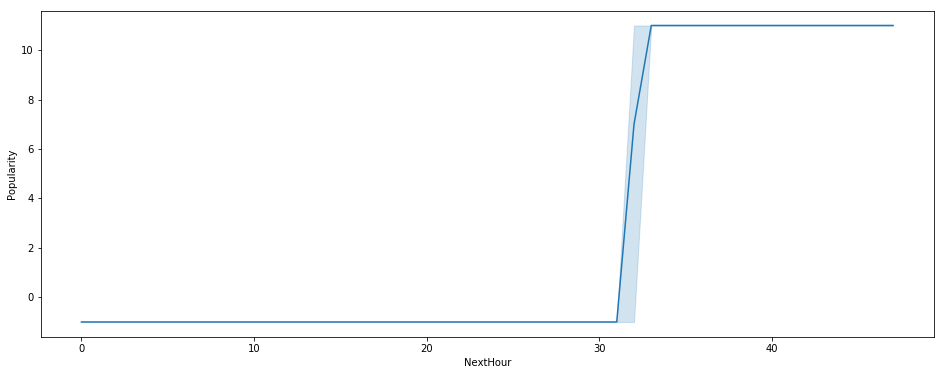

In [79]:
plt.figure(figsize=(16, 6))
df = Facebook_Microsoft_M[Facebook_Microsoft_M['IDLink'] == 328]
ax = sns.lineplot(x='NextHour', 
                  y ='Popularity', 
                  data=df)

In [19]:
Facebook_Microsoft_M.to_csv("Facebook_Microsoft_updated.csv", index=False)

In [57]:
microsoft.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
3,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
4,27813.0,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1
5,27812.0,Microsoft sneaks onto Android while Android sn...,The platform battles are back MWC16 +Analysis ...,The Register,microsoft,2015-03-01 02:15:00,0.000000,0.052670,-1,-1,-1
6,27814.0,"HoloLens dev edition costs £2,000 with new Con...",Microsoft’s AR headset is being made available...,Metro,microsoft,2015-03-01 02:18:00,0.000000,0.079434,-1,-1,-1


In [63]:
print(microsoft.loc[microsoft['IDLink'] == 23208,'Headline'])

12440    Microsoft might not make their digital assistant, Cortana, say that you have no friends over a silly question, but it will definitely not take your crap
Name: Headline, dtype: object


#### Assignment

In [36]:
microsoft[(microsoft['Facebook'] > 0) & (microsoft['Facebook']< 13000)].groupby('Source').count()['Facebook'].sort_values(ascending = False)

Source
WinBeta                                         643
ZDNet                                           429
MSPoweruser.com                                 382
Business Insider                                347
The Register                                    284
PC World                                        269
Neowin                                          254
Forbes                                          248
Windows Central                                 235
The Verge                                       231
Softpedia News                                  195
VentureBeat                                     189
BetaNews                                        181
Computerworld                                   158
Business Insider via Yahoo! Finance             156
CNET                                            148
InfoWorld                                       147
GeekWire                                        135
Motley Fool                                     132
eWeek

# Google Plus - Microsoft

In [8]:
GooglePlus_Microsoft_M = GooglePlus_Microsoft.merge(microsoft, on="IDLink", how="left")
GooglePlus_Microsoft_M = GooglePlus_Microsoft_M.melt(id_vars=microsoft.columns)
GooglePlus_Microsoft_M.rename(columns={'variable' : 'TimeStamp', 'value' : 'Popularity'}, inplace=True)
GooglePlus_Microsoft_M = GooglePlus_Microsoft_M.merge(TimeStamp, on="TimeStamp", how="left")
GooglePlus_Microsoft_M['PublishDate'] = pd.to_datetime(GooglePlus_Microsoft_M['PublishDate'],format='%Y-%m-%d %H:%M:%S')

In [25]:
GooglePlus_Microsoft_M['NewDay'] = Facebook_Microsoft_M['PublishDate'].dt.day + Facebook_Microsoft_M['Day']

In [26]:
TimeString = GooglePlus_Microsoft_M['Hour'].map("{:02}".format).map(str) + ":" +  GooglePlus_Microsoft_M['Minute'].map("{:02}".format).map(str)
GooglePlus_Microsoft_M['Derived_DateTime'] = pd.to_datetime(TimeString, format="%H:%M")

In [27]:
GooglePlus_Microsoft_M['PublishedHour'] = GooglePlus_Microsoft_M['PublishDate'].dt.hour
GooglePlus_Microsoft_M['PublishedMinute'] = GooglePlus_Microsoft_M['PublishDate'].dt.minute

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


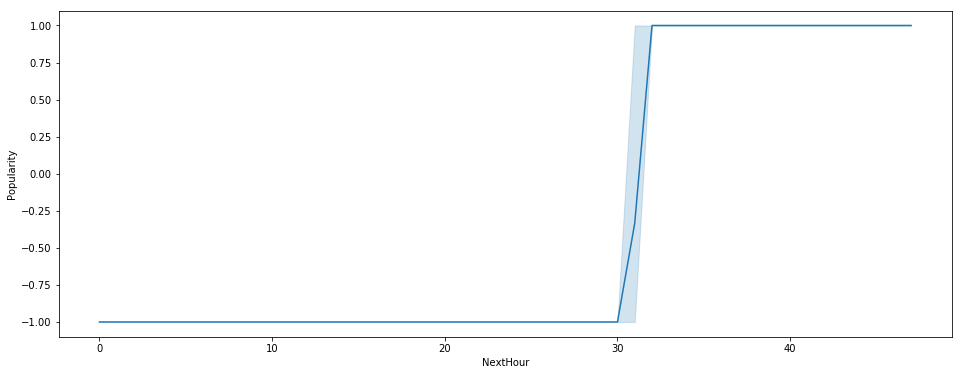

In [80]:
plt.figure(figsize=(16, 6))
df = GooglePlus_Microsoft_M[GooglePlus_Microsoft_M['IDLink'] == 328]
ax = sns.lineplot(x='NextHour', 
                  y ='Popularity', 
                  data=df)

# Linked IN - Microsoft

In [9]:
LinkedIn_Microsoft_M = LinkedIn_Microsoft.merge(microsoft, on="IDLink", how="left")
LinkedIn_Microsoft_M = LinkedIn_Microsoft_M.melt(id_vars=microsoft.columns)
LinkedIn_Microsoft_M.rename(columns={'variable' : 'TimeStamp', 'value' : 'Popularity'}, inplace=True)
LinkedIn_Microsoft_M = LinkedIn_Microsoft_M.merge(TimeStamp, on="TimeStamp", how="left")
LinkedIn_Microsoft_M['PublishDate'] = pd.to_datetime(LinkedIn_Microsoft_M['PublishDate'],format='%Y-%m-%d %H:%M:%S')

In [12]:
LinkedIn_Microsoft_M['NewDay'] = LinkedIn_Microsoft_M['PublishDate'].dt.day + LinkedIn_Microsoft_M['Day']

In [13]:
TimeString = LinkedIn_Microsoft_M['Hour'].map("{:02}".format).map(str) + ":" +  LinkedIn_Microsoft_M['Minute'].map("{:02}".format).map(str)
LinkedIn_Microsoft_M['Derived_DateTime'] = pd.to_datetime(TimeString, format="%H:%M")

In [ ]:
LinkedIn_Microsoft_M['PublishedHour'] = LinkedIn_Microsoft_M['PublishDate'].dt.hour
LinkedIn_Microsoft_M['PublishedMinute'] = LinkedIn_Microsoft_M['PublishDate'].dt.minute

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


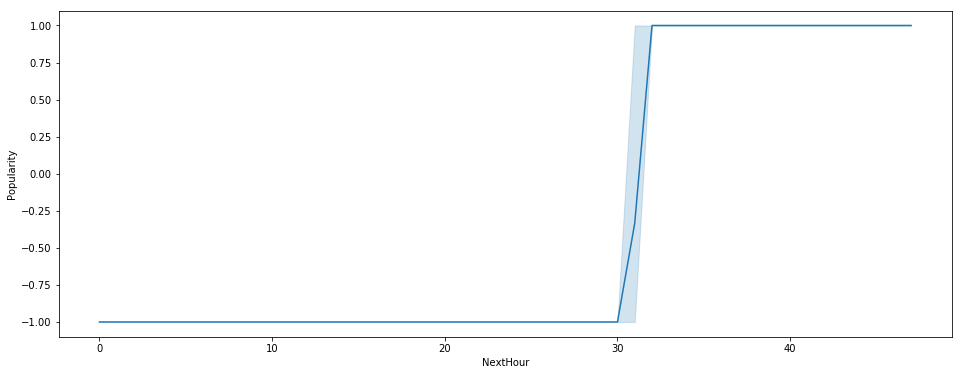

In [81]:
plt.figure(figsize=(16, 6))
df = LinkedIn_Microsoft_M[LinkedIn_Microsoft_M['IDLink'] == 328]
ax = sns.lineplot(x='NextHour', 
                  y ='Popularity', 
                  data=df)

# Facebook - Palestine

In [48]:
palestine = news_data[news_data['Topic'] == "palestine"]
Facebook_palestine = pd.read_csv("Facebook_Palestine.csv")
GooglePlus_palestine = pd.read_csv("GooglePlus_Palestine.csv")
LinkedIn_palestine = pd.read_csv("LinkedIn_Palestine.csv")
TimeStamp = pd.read_csv("TimeStamp.csv")

In [49]:
Facebook_palestine_p = Facebook_palestine.merge(palestine, on="IDLink", how="left")
Facebook_palestine_p = Facebook_palestine_p.melt(id_vars=palestine.columns)
Facebook_palestine_p.rename(columns={'variable' : 'TimeStamp', 'value' : 'Popularity'}, inplace=True)
Facebook_palestine_p = Facebook_palestine_p.merge(TimeStamp, on="TimeStamp", how="left")
Facebook_palestine_p['PublishDate'] = pd.to_datetime(Facebook_palestine_p['PublishDate'],format='%Y-%m-%d %H:%M:%S')

In [50]:
Facebook_palestine_p['NewDay'] = Facebook_palestine_p['PublishDate'].dt.day + Facebook_palestine_p['Day']

In [51]:
TimeString = Facebook_palestine_p['Hour'].map("{:02}".format).map(str) + ":" +  Facebook_palestine_p['Minute'].map("{:02}".format).map(str)
Facebook_palestine_p['Derived_DateTime'] = pd.to_datetime(TimeString, format="%H:%M")

In [52]:
Facebook_palestine_p['PublishedHour'] = Facebook_palestine_p['PublishDate'].dt.hour
Facebook_palestine_p['PublishedMinute'] = Facebook_palestine_p['PublishDate'].dt.minute

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


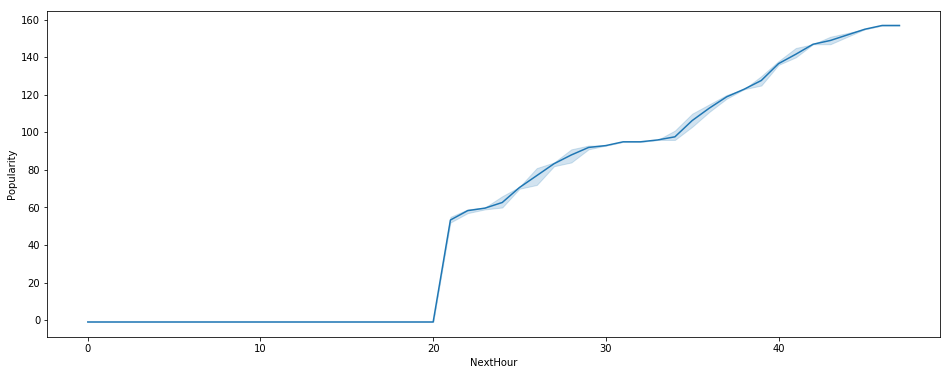

In [87]:
plt.figure(figsize=(16, 6))
df = Facebook_palestine_p[Facebook_palestine_p['IDLink'] == 61978

]
ax = sns.lineplot(x='NextHour', 
                  y ='Popularity', 
                  data=df)

# Google Plus - Palestine

In [54]:
GooglePlus_palestine_p = GooglePlus_palestine.merge(palestine, on="IDLink", how="left")
GooglePlus_palestine_p = GooglePlus_palestine_p.melt(id_vars=palestine.columns)
GooglePlus_palestine_p.rename(columns={'variable' : 'TimeStamp', 'value' : 'Popularity'}, inplace=True)
GooglePlus_palestine_p = GooglePlus_palestine_p.merge(TimeStamp, on="TimeStamp", how="left")
GooglePlus_palestine_p['PublishDate'] = pd.to_datetime(GooglePlus_palestine_p['PublishDate'],format='%Y-%m-%d %H:%M:%S')

In [55]:
GooglePlus_palestine_p['NewDay'] = GooglePlus_palestine_p['PublishDate'].dt.day + GooglePlus_palestine_p['Day']

In [56]:
GooglePlus_palestine_p['PublishedHour'] = GooglePlus_palestine_p['PublishDate'].dt.hour
GooglePlus_palestine_p['PublishedMinute'] = GooglePlus_palestine_p['PublishDate'].dt.minute

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


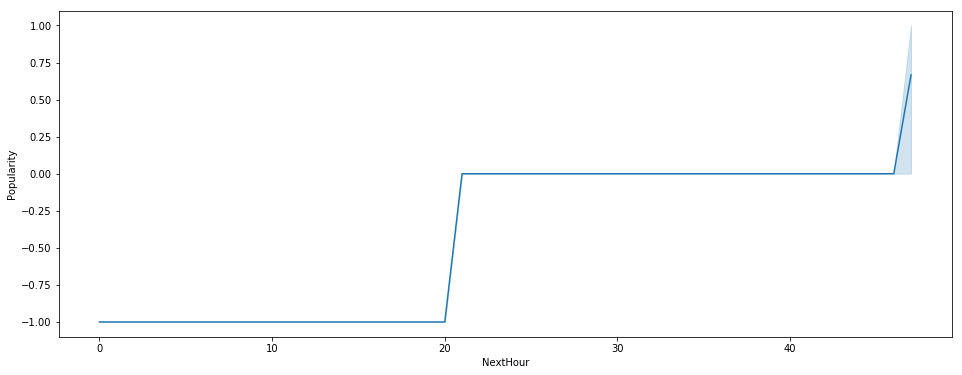

In [88]:
plt.figure(figsize=(16, 6))
df = GooglePlus_palestine_p[GooglePlus_palestine_p['IDLink'] == 61978
]
ax = sns.lineplot(x='NextHour', 
                  y ='Popularity', 
                  data=df)

# Linked IN - Palestine

In [58]:
LinkedIn_palestine_p = LinkedIn_palestine.merge(palestine, on="IDLink", how="left")
LinkedIn_palestine_p = LinkedIn_palestine_p.melt(id_vars=palestine.columns)
LinkedIn_palestine_p.rename(columns={'variable' : 'TimeStamp', 'value' : 'Popularity'}, inplace=True)
LinkedIn_palestine_p = LinkedIn_palestine_p.merge(TimeStamp, on="TimeStamp", how="left")
LinkedIn_palestine_p['PublishDate'] = pd.to_datetime(LinkedIn_palestine_p['PublishDate'],format='%Y-%m-%d %H:%M:%S')

In [59]:
LinkedIn_palestine_p['NewDay'] = LinkedIn_palestine_p['PublishDate'].dt.day + LinkedIn_palestine_p['Day']

In [60]:
TimeString = LinkedIn_palestine_p['Hour'].map("{:02}".format).map(str) + ":" +  LinkedIn_palestine_p['Minute'].map("{:02}".format).map(str)
LinkedIn_palestine_p['Derived_DateTime'] = pd.to_datetime(TimeString, format="%H:%M")

In [61]:
LinkedIn_palestine_p['PublishedHour'] = LinkedIn_palestine_p['PublishDate'].dt.hour
LinkedIn_palestine_p['PublishedMinute'] = LinkedIn_palestine_p['PublishDate'].dt.minute

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


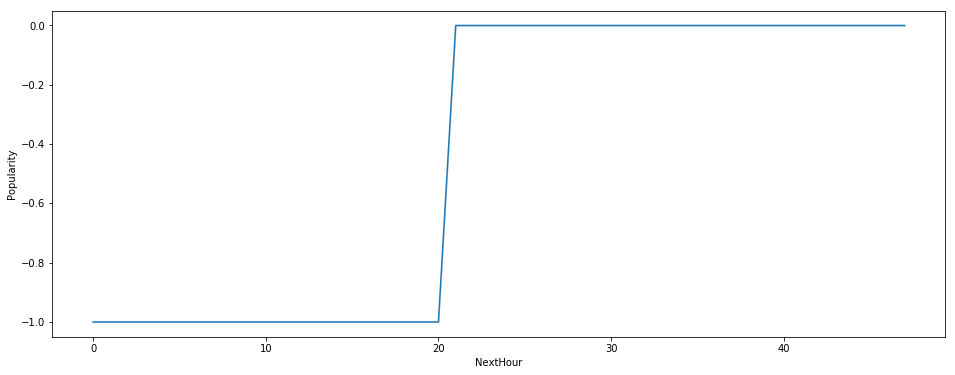

In [90]:
plt.figure(figsize=(16, 6))
df = LinkedIn_palestine_p[LinkedIn_palestine_p['IDLink'] == 61978
]
ax = sns.lineplot(x='NextHour', 
                  y ='Popularity', 
                  data=df)